## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
import warnings

#### Import the CSV Data as Pandas DataFrame

In [14]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [15]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Adding a Total Score column

In [19]:
df['Percentage_Score'] = (df['math_score'] + df['writing_score'] + df['reading_score']) / 300 * 100
#Round to 2 decimal places 
df['Percentage_Score'] = df['Percentage_Score'].round(2)


In [22]:
df.drop(['math_score','writing_score','reading_score'],axis=1,inplace=True)

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Percentage_Score
0,female,group B,bachelor's degree,standard,none,72.67
1,female,group C,some college,standard,completed,82.33
2,female,group B,master's degree,standard,none,92.67
3,male,group A,associate's degree,free/reduced,none,49.33
4,male,group C,some college,standard,none,76.33


In [24]:
def assign_grades(percentage_score):
    if percentage_score >= 90:
        return 'A'
    elif percentage_score >= 80:
        return 'B'
    elif percentage_score >= 70:
        return 'C'
    elif percentage_score >= 60:
        return 'D'
    elif percentage_score >= 50:
        return 'E'
    else:
        return 'F'

def add_grades_column(df):
    df['Grades'] = df['Percentage_Score'].apply(assign_grades)
    return df


In [26]:
df = add_grades_column(df) 

In [30]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Percentage_Score,Grades
0,female,group B,bachelor's degree,standard,none,72.67,C
1,female,group C,some college,standard,completed,82.33,B
2,female,group B,master's degree,standard,none,92.67,A
3,male,group A,associate's degree,free/reduced,none,49.33,F
4,male,group C,some college,standard,none,76.33,C
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.00,A
996,male,group C,high school,free/reduced,none,57.33,E
997,female,group C,high school,free/reduced,completed,65.00,D
998,female,group D,some college,standard,completed,74.33,C


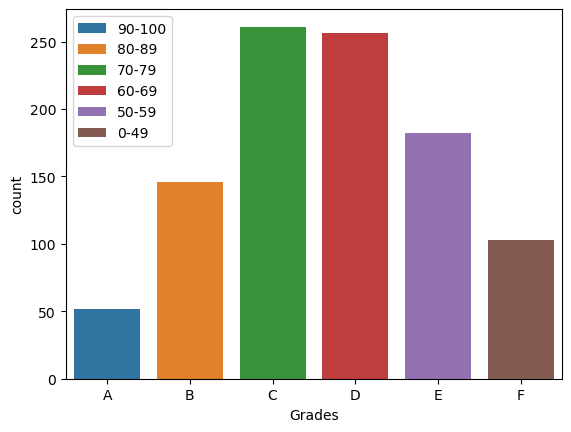

In [100]:
ax = sns.countplot(data=df,x=df['Grades'].sort_values())


legend_labels = {
    'A': '90-100',
    'B': '80-89',
    'C': '70-79',
    'D': '60-69',
    'E': '50-59',
    'F': '0-49'
}

labels = [legend_labels[label.get_text()] for label in ax.get_xticklabels()]

plt.legend(ax.patches, labels)


In [103]:
X = df.drop(['Percentage_Score','Grades'],axis=1) 

In [105]:
 y = df['Grades']
    

In [106]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### Handling Categorical Features

In [107]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [108]:
gen = pd.get_dummies(X,drop_first= True)

In [109]:
gen

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


## Mutual Info and F Score when target is average score

In [111]:
from sklearn.feature_selection import mutual_info_regression

In [15]:

categorical_features = gen.columns
numerical_feature = 'average'

mi_scores = []
for feature in categorical_features:
    mi_score = mutual_info_regression(gen[[feature]],y)
    mi_scores.append(mi_score[0])


mi_df = pd.DataFrame({'Feature': categorical_features, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

In [16]:
mi_df

,Feature,MI Score
10,lunch_standard,0.094687
11,test_preparation_course_none,0.045800
5,parental_level_of_education_bachelor's degree,0.017143
8,parental_level_of_education_some college,0.011621
4,race_ethnicity_group E,0.005625
6,parental_level_of_education_high school,0.005353
3,race_ethnicity_group D,0.003467
7,parental_level_of_education_master's degree,0.001253
1,race_ethnicity_group B,0.000390
0,gender_male,0.000000


<BarContainer object of 12 artists>

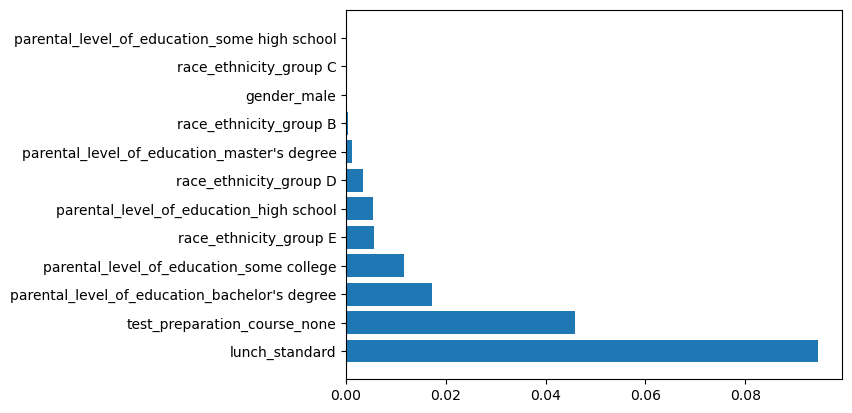

In [17]:
plt.barh(mi_df['Feature'], mi_df['MI Score'])

#### Lunch Standard has highest Mutual Information with Average Score

In [18]:
from sklearn.feature_selection import f_classif

In [19]:
f_scores, p_values = f_classif(gen, y)


In [25]:
Data = []
for feature_name, f_score, p_value in zip(gen.columns, f_scores, p_values):
    Data.append({'Feature':feature_name,'f_score':f_score,'p value' :p_value})

In [30]:
DataDf = pd.DataFrame(Data).sort_values(by = 'f_score',ascending=False)

In [31]:
DataDf

,Feature,f_score,p value
10,lunch_standard,1.499200,0.000092
11,test_preparation_course_none,1.299390,0.008336
1,race_ethnicity_group B,1.183359,0.062614
4,race_ethnicity_group E,1.158647,0.089938
6,parental_level_of_education_high school,1.150393,0.100933
8,parental_level_of_education_some college,1.106596,0.177331
9,parental_level_of_education_some high school,1.059739,0.295333
5,parental_level_of_education_bachelor's degree,1.044816,0.340350
0,gender_male,1.027161,0.397375
3,race_ethnicity_group D,1.021293,0.417075


### Mutual Info and Chi square Score when target is Grades

In [124]:
from sklearn.feature_selection import mutual_info_classif

In [125]:
categorical_features = gen.columns
numerical_feature = 'Grades'

mi_scores_grades = []
for feature in categorical_features:
    mi_score = mutual_info_classif(gen[[feature]],y)
    mi_scores_grades.append(mi_score[0])


mi_df_grades = pd.DataFrame({'Feature': categorical_features, 'MI Score': mi_scores_grades}).sort_values(by='MI Score', ascending=False)

In [126]:
mi_df_grades

,Feature,MI Score
11,test_preparation_course_none,0.051256
10,lunch_standard,0.047001
6,parental_level_of_education_high school,0.032425
5,parental_level_of_education_bachelor's degree,0.028028
1,race_ethnicity_group B,0.024167
8,parental_level_of_education_some college,0.020992
7,parental_level_of_education_master's degree,0.014092
4,race_ethnicity_group E,0.011615
0,gender_male,0.006788
2,race_ethnicity_group C,0.005004


<BarContainer object of 12 artists>

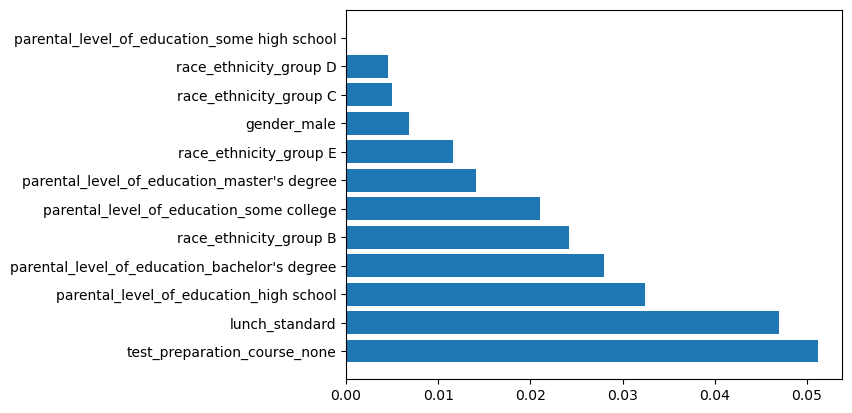

In [127]:
plt.barh(mi_df_grades['Feature'], mi_df_grades['MI Score'])

In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [134]:
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(gen, y)

# Get the p-values and scores
p_values = selector.pvalues_
scores = selector.scores_

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Feature': gen.columns, 'Score': scores, 'p-value': p_values})
results_df = results_df.sort_values(by='Score', ascending=False)

In [135]:
results_df

,Feature,Score,p-value
10,lunch_standard,28.377626,0.000031
11,test_preparation_course_none,24.837036,0.000150
6,parental_level_of_education_high school,21.363695,0.000691
4,race_ethnicity_group E,19.469523,0.001571
5,parental_level_of_education_bachelor's degree,13.072047,0.022713
0,gender_male,12.382077,0.029911
7,parental_level_of_education_master's degree,11.009090,0.051200
9,parental_level_of_education_some high school,9.925575,0.077372
1,race_ethnicity_group B,8.365296,0.137219
3,race_ethnicity_group D,4.526493,0.476347


### Similar to MI and the one where average was used

## Handlong categ features again but using target ( average score) encoding for race and parent

In [72]:
gen1 = X.copy()

In [73]:
gen1.drop(['race_ethnicity','parental_level_of_education'],axis=1,inplace= True)

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
classes = []
for columns in gen1.columns:
    gen1[columns] = le.fit_transform(gen1[columns])
    classes.append(le.classes_)

In [76]:
gen1

,gender,lunch,test_preparation_course
0,0,1,1
1,0,1,0
2,0,1,1
3,1,0,1
4,1,1,1
...,...,...,...
995,0,1,0
996,1,0,1
997,0,0,0
998,0,1,0


In [77]:
classes

[array(['female', 'male'], dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

In [141]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['race_ethnicity', 'parental_level_of_education'])


In [142]:
df_encoded = encoder.fit_transform(X,y)

In [156]:
df_encoded.drop(['gender','lunch','test_preparation_course'],axis=1,inplace=True)

In [158]:
gen1= pd.concat([gen1,df_encoded],axis=1)

In [165]:
Encoded_df_final = gen1.copy()

In [168]:
Encoded_df_final.head()

,gender,lunch,test_preparation_course,race_ethnicity,parental_level_of_education
0,0,1,1,65.468421,71.923499
1,0,1,0,67.131661,68.476401
2,0,1,1,65.468421,73.483237
3,1,0,1,62.997320,69.569069
4,1,1,1,67.131661,68.476401


In [169]:

MI_ohe_target_scores = []

for column in Encoded_df_final.columns:
    score = mutual_info_regression(Encoded_df_final[[column]],y)
    MI_ohe_target_scores.append(score[0])

In [170]:
MI_ohe_target_scores

[0.018252574877450023,
 0.060438384553270774,
 0.05108743632376722,
 0.013396637265403744,
 0.04223038990206751]

In [171]:
MI_EN_df = pd.DataFrame({'Feature': Encoded_df_final.columns, 'MI Score': MI_ohe_target_scores}).sort_values(by='MI Score', ascending=False)

<BarContainer object of 5 artists>

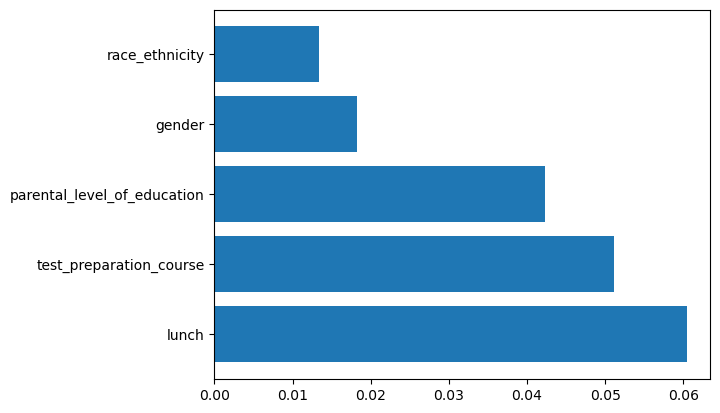

In [173]:
plt.barh(MI_EN_df['Feature'], MI_EN_df['MI Score'])

### Insights :

            -We can select lunch, test prep and parental education as our top 3 features.
            - Even after segregating average scores as Grades, from chi2 and Mutual information we can see similar results

In [174]:
Final_X_df = Encoded_df_final[['lunch','test_preparation_course','parental_level_of_education']]

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final_X_df,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 3), (200, 3))

#### Create an Evaluate Function to give all metrics after model Training

In [186]:
models_params= {
                "Decision Tree": 
                            {
                            'model_obj' : DecisionTreeRegressor(),
                            'params' : {
                                                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                                    'max_depth':[5,10,15,20],
                                                    'ccp_alpha' :[0.0,0.005,0.01,0.02,0.03]
                                                    # 'max_features':['sqrt','log2'],
                                                    },
                        },
                
                "Random Forest": 
                            {
                            'model_obj' : RandomForestRegressor(),
                            'params' : {
                                                        'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                                        'max_features':['sqrt','log2',None],
                                                        'n_estimators': [8,16,32,64,128,256]
                                                    },
                            },

                "Gradient Boosting": 
                            {
                            'model_obj' : GradientBoostingRegressor(),
                            'params' : {
                                                        'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                                                        'learning_rate':[0.1,.01,.05,.001],
                                                        'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                                                        # 'criterion':['squared_error', 'friedman_mse'],
                                                        # 'max_features':['auto','sqrt','log2'],
                                                        'n_estimators': [8,16,32,64,128,256]
                                                        },
                            },

                "Linear Regression":
                            {
                            'model_obj' : LinearRegression(),
                            'params' : {}
                            },

                "XGBRegressor":
                            {
                            'model_obj' : XGBRegressor(),
                            'params' : {
                                                        'learning_rate':[.1,.01,.05,.001],
                                                        'n_estimators': [8,16,32,64,128,256]
                                                    },
                            },

                "CatBoosting Regressor": 
                            {
                            'model_obj' : CatBoostRegressor(verbose=False),
                            'params' :     {
                                                    'depth': [6,8,10],
                                                    'learning_rate': [0.01, 0.05, 0.1],
                                                    'iterations': [30, 50, 100]
                                                    },
                            },

                "AdaBoost Regressor": 
                            {
                            'model_obj' : AdaBoostRegressor(),
                            'params' :     {
                                                    'learning_rate':[.1,.01,0.5,.001],
                                                    'loss':['linear','square','exponential'],
                                                    'n_estimators': [8,16,32,64,128,256]
                                                    },
                            },
                "Lasso": 
                    {
                        'model_obj' : Lasso(),
                        'params' :{
                                            'alpha': [.1,.01,.05,.001,0.0001],
                                            'max_iter' : [10000]
                                        },
                    },

                "Ridge" : 
                    {
                        'model_obj' : Ridge(),
                        'params': {
                                            'alpha': [.1,.01,.05,.001,0.0001],
                                            'max_iter' : [10000]
                                        },
                    },

                "KNN" :
                    {
                        'model_obj' : KNeighborsRegressor(),
                    'params' : {
                                    'n_neighbors' : [3,5,8,11,15,20]
                                    },
                    },
                'SVR' :{
                        'model_obj' : SVR(),
                        'params':{
                                        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                                        'gamma' :['scale','auto'],
                                        'C': [0.1,1, 10, 100]
                                    },
                },
                
            }

In [187]:
def evaluate_models(X_train,y_train,X_test,y_test,models_params):
    
        report = []

        for model_name,m_p in models_params.items():

            model = m_p['model_obj']                    # Since models_params has nested dicts, m_p contains model objects and parameters.
            params = m_p['params']

            gs = GridSearchCV(model,params,cv=4)
            gs.fit(X_train,y_train)

            model.set_params(**gs.best_params_)         # setting the best parameters for the respective models.
            model.fit(X_train,y_train)

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = r2_score(y_train,y_train_pred)

            test_model_score = r2_score(y_test,y_test_pred)
            
            Mae = mean_absolute_error(y_test, y_test_pred)

            # Calculate MSE
            Mse = mean_squared_error(y_test, y_test_pred)
            
            report.append(
                {
                'Model_name' : model_name,
                'R2_Score_test' : test_model_score,
                'R2_Score_train' : train_model_score,
                'MAE' : Mae,
                'MSE' : Mse,
                'Best_Params' : gs.best_params_

                }
            )

        return report

In [190]:
model_report = evaluate_models(X_train,y_train,X_test,y_test,models_params)

In [192]:
report_df = pd.DataFrame(model_report).sort_values(by= 'R2_Score_test',ascending = False)

In [193]:
report_df

,Model_name,R2_Score_test,R2_Score_train,MAE,MSE,Best_Params
7,Lasso,0.158309,0.209730,10.536496,180.430349,"{'alpha': 0.01, 'max_iter': 10000}"
8,Ridge,0.158058,0.209735,10.538083,180.484298,"{'alpha': 0.1, 'max_iter': 10000}"
3,Linear Regression,0.158020,0.209735,10.538291,180.492268,{}
0,Decision Tree,0.150429,0.216737,10.669968,182.119603,"{'ccp_alpha': 0.005, 'criterion': 'poisson', '..."
10,SVR,0.146003,0.206845,10.635497,183.068308,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
6,AdaBoost Regressor,0.144082,0.217476,10.708512,183.480217,"{'learning_rate': 0.5, 'loss': 'exponential', ..."
2,Gradient Boosting,0.137177,0.223157,10.713611,184.960307,"{'learning_rate': 0.01, 'loss': 'squared_error..."
5,CatBoosting Regressor,0.136875,0.219113,10.703099,185.025249,"{'depth': 6, 'iterations': 50, 'learning_rate'..."
9,KNN,0.127676,0.211881,10.818500,186.997097,{'n_neighbors': 20}
4,XGBRegressor,0.124432,0.227504,10.764388,187.692556,"{'learning_rate': 0.05, 'n_estimators': 128}"


In [202]:
corr = pd.concat([gen1,y],axis=1)[['gender','lunch','test_preparation_course','race_ethnicity','parental_level_of_education','average']].corr()

In [ ]:
corr

<Axes: >

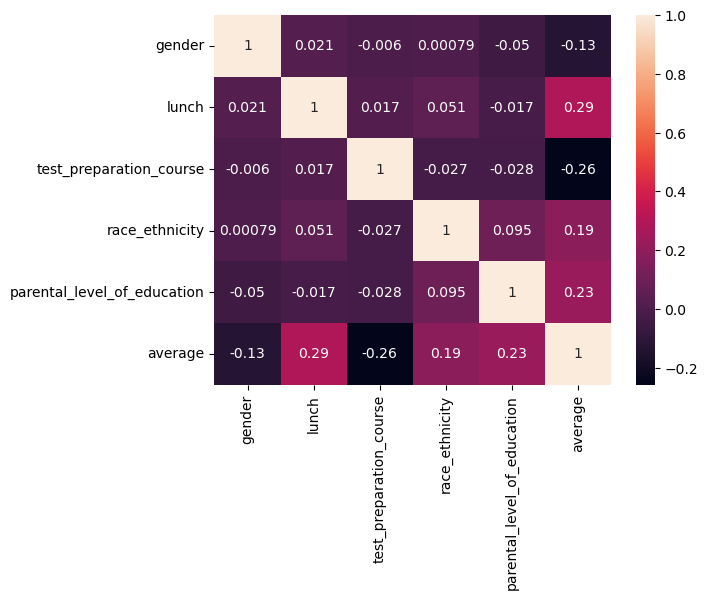

In [203]:
sns.heatmap(corr,annot=True)

In [240]:
model = Lasso()
param = {'alpha': 0.01, 'max_iter': 10000}
model.set_params(**param)

Lasso(alpha=0.01, max_iter=10000)

In [234]:
model.fit(X_train,y_train)
pred= model.predict(X_test)

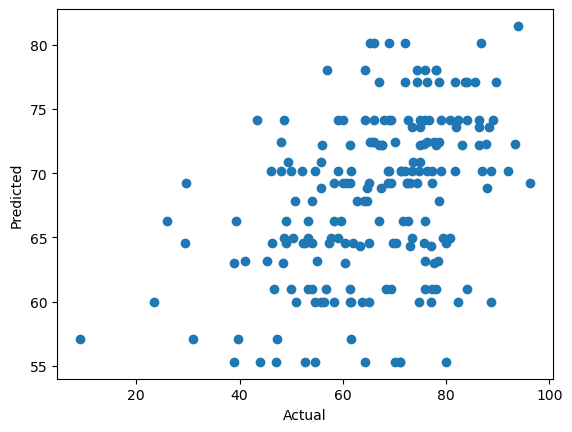

In [235]:
plt.scatter(y_test,pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

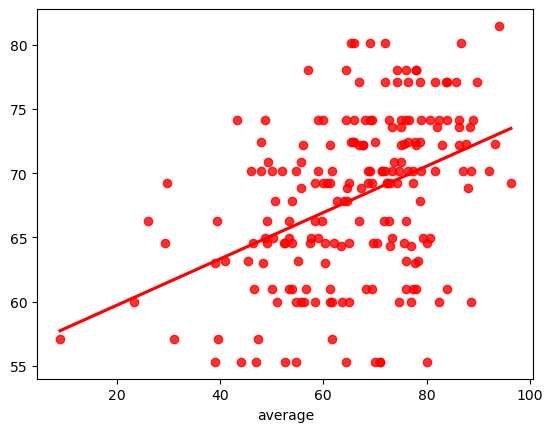

In [236]:
sns.regplot(x=y_test,y=pred,ci=None,color ='red');

## As we can see, the regression fit is not good when we selected the best model ( Lasso)

# Trying with Classification Models since we have Grades

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [213]:
classification_model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
                "penalty": ['l2'],
                "C": [0.1, 1, 10],
                "solver": ['newton-cg', 'lbfgs'],
                "multi_class": ['ovr', 'multinomial']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ['gini', 'entropy'],
            "max_depth": [None, 5, 10, 15],

        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 500],
            "criterion": ['gini', 'entropy'],
            "max_depth": [None, 5, 10, 15],

        }
    },
    
    "XGBoost": {
        "model": XGBClassifier(),
        "params": {
            "learning_rate": [0.01, 0.1,0.5, 1],
            "n_estimators": [100, 200, 500,1000],
            "max_depth": [3, 5, 10],
            "min_child_weight": [1, 5, 10],
            "gamma": [0, 0.1, 0.2]
        }
    },
    
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            "learning_rate": [0.01, 0.1, 1],
            "n_estimators": [50, 100, 200],
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance'],
            "p": [1, 2]
        }
    },
    "Support Vector Machine": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
            "gamma": ['scale', 'auto']
        }
    },
}

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [211]:


def evaluate_models_classification(X_train, y_train, X_test, y_test, classification_model_params):
    report_classification = []

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    for model_name, m_p in classification_model_params.items():
        model = m_p['model']
        params = m_p['params']

        gs = GridSearchCV(model, params, cv=4)
        gs.fit(X_train, y_train_encoded)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train_encoded)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred)
        y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

        accuracy = accuracy_score(y_test, y_test_pred_decoded)
        precision_macro = precision_score(y_test, y_test_pred_decoded, average='macro',zero_division=1)
        recall_macro = recall_score(y_test, y_test_pred_decoded, average='macro')
        f1_macro = f1_score(y_test, y_test_pred_decoded, average='macro')

        report_classification.append({
            'Model_name': model_name,
            'Accuracy': accuracy,
            'Precision (Macro)': precision_macro,
            'Recall (Macro)': recall_macro,
            'F1-score (Macro)': f1_macro,
            'Best_Params': gs.best_params_
        })

    return report_classification


In [153]:
from sklearn.model_selection import train_test_split
X_train_classif, X_test_classif, y_train_classif, y_test_classif = train_test_split(gen,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 12), (200, 12))

In [214]:
model_classif_report = evaluate_models_classification(X_train_classif, y_train_classif, X_test_classif, y_test_classif, classification_model_params)

In [218]:
classif_report_df = pd.DataFrame(model_classif_report).sort_values(by='Accuracy', ascending=False)

In [221]:
classif_report_df

,Model_name,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro),Best_Params
1,Decision Tree,0.300,0.257319,0.226246,0.228813,"{'criterion': 'entropy', 'max_depth': 5}"
0,Logistic Regression,0.295,0.312293,0.196400,0.166692,"{'C': 1, 'multi_class': 'multinomial', 'penalt..."
7,Support Vector Machine,0.295,0.768404,0.184793,0.129172,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}"
2,Random Forest,0.285,0.288338,0.217322,0.208635,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
4,AdaBoost,0.285,0.626241,0.181712,0.146082,"{'learning_rate': 0.1, 'n_estimators': 50}"
5,Naive Bayes,0.280,0.284326,0.310402,0.248841,{}
3,XGBoost,0.265,0.291474,0.171055,0.143446,"{'gamma': 0.1, 'learning_rate': 0.01, 'max_dep..."
6,K-Nearest Neighbors,0.210,0.216568,0.242502,0.195204,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}"


### Confusion matrix for Decision Tree Classifier since it gave highest accuracy

In [255]:
Dt = DecisionTreeClassifier()
params = classif_report_df.iloc[0]['Best_Params']
Dt.set_params(**params)
Dt.fit(X_train_classif, y_train_classif)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [256]:
dt_pred = Dt.predict(X_test_classif)
#confusion_matrix(y_test_classif, dt_pred)
cm = confusion_matrix(y_test_classif, dt_pred)

<Axes: >

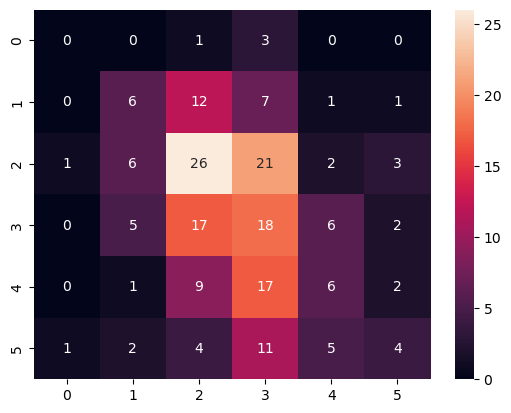

In [257]:
sns.heatmap(cm, annot=True)

In [235]:
NN_gen = gen.copy()

In [240]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, accuracy_score

In [245]:
NN_gen.shape[1]

12

In [250]:


# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(NN_gen.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y_train_classif)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Perform K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store the evaluation metrics
precision_values = []
accuracy_values = []

for train_index, test_index in kf.split(gen):
    X_train, X_test = NN_gen.loc[train_index], NN_gen.loc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict labels for test data
    y_pred_probs = model.predict(X_test)
    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate precision and accuracy
    precision = precision_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    precision_values.append(precision)
    accuracy_values.append(accuracy)

# Calculate the average metrics


7/7 [==============================] - 0s 2ms/step


C:\Users\Swamesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 2ms/step


In [251]:
avg_precision = np.mean(precision_values)
avg_accuracy = np.mean(accuracy_values)

print('Average Precision:', avg_precision)
print('Average Accuracy:', avg_accuracy)


Average Precision: 0.2841738777374429
Average Accuracy: 0.31999999999999995


## As we can see, classification report does not give good values of accuracy,precision and recall. Even Nerural Network does not perform well

In [277]:
sk = SelectKBest(score_func=chi2, k=5)

# Fit and transform the feature matrix
gen_sk = sk.fit_transform(gen, y)

# Get the scores of the selected features
feature_scores = sk.scores_

# Get the column names of the selected features
feature_names = gen.columns

# Create a DataFrame with feature names and scores
selected_features_df = pd.DataFrame({'Feature Name': feature_names, 'Score': feature_scores})

# Sort the DataFrame by score in descending order
selected_features_df = selected_features_df.sort_values('Score', ascending=False)

# Reset the index of the DataFrame
selected_features_df = selected_features_df.reset_index(drop=True)

In [278]:
selected_features_df

,Feature Name,Score
0,lunch_standard,28.377626
1,test_preparation_course_none,24.837036
2,parental_level_of_education_high school,21.363695
3,race_ethnicity_group E,19.469523
4,parental_level_of_education_bachelor's degree,13.072047
5,gender_male,12.382077
6,parental_level_of_education_master's degree,11.009090
7,parental_level_of_education_some high school,9.925575
8,race_ethnicity_group B,8.365296
9,race_ethnicity_group D,4.526493
